In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pingouin as pg

datafile = '/home/bizzego/UniTn/data/GxE_Cataldo/dataset.csv'

/opt/bizzego/miniconda3/envs/work/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
TARGET = 'RRmean_normStimuli'

/opt/bizzego/miniconda3/envs/work/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.10, the latest is 0.3.12.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
data = pd.read_csv(datafile)
data.dropna(axis=0, inplace=True)

In [4]:
N_sub = len(data['subject'].unique())

In [5]:
#%% add vulnerability columns
data['vuln_76'] = 0
data.loc[(data['rs53576'] == 'GG'), 'vuln_76'] = 1

#data['vuln_98'] = 0 #!!! CORRECT?
#data.loc[(data['rs2254298'] == 'AA'), 'vuln_98'] = 1 #!!! CORRECT?

#### Is HRV normal? --> NO

                           W      pval  normal
RRmean_normStimuli  0.959066  0.000146   False


<AxesSubplot:title={'center':'RRmean_normStimuli'}, xlabel='label'>

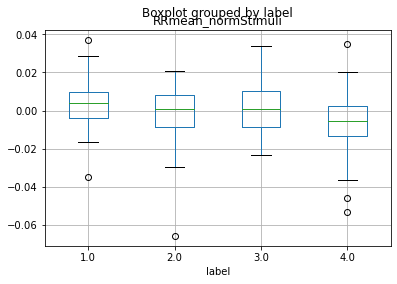

In [6]:
results_normality = pg.normality(data[TARGET])
print(results_normality)
data.boxplot(TARGET, by='label')

#### does HRV depend on the stimulus? --> YES

In [7]:
#kruskal because not normal
pg.kruskal(data, dv=TARGET, between='label')

Source  ddof1         H     p-unc
Kruskal  label      3  9.722848  0.021075

post-hoc here ...

### Gene x Env (for each type of stimulus)

In [17]:
genes = ['vuln_76']
envs = ['PBI_M_care',
        'PBI_M_overp',
        'PBI_F_care',
        'PBI_F_overp']

#### CAT CRY (label = 1)

In [18]:
data_label = data.query('label == 1')
for gene_col in genes:
    for env_col in envs:
        formula = f'{TARGET} ~ C({gene_col}) + {env_col} + C({gene_col})*{env_col}'
        model = smf.ols(formula=formula, data=data_label).fit()
        print('\n')
        print(f'{gene_col} x {env_col}')
        print(model.summary())
        print(pg.normality(model.resid))

#### 3MO CRY (label = 2)

In [20]:
data_label = data.query('label == 2')
for gene_col in genes:
    for env_col in envs:
        formula = f'{TARGET} ~ C({gene_col}) + {env_col} + C({gene_col})*{env_col}'
        model = smf.ols(formula=formula, data=data_label).fit()
        print('\n')
        print(f'{gene_col} x {env_col}')
        print(model.summary())
        print(pg.normality(model.resid))



vuln_76 x PBI_M_care
                            OLS Regression Results                            
Dep. Variable:     RRmean_normStimuli   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                 -0.041
Method:                 Least Squares   F-statistic:                    0.5034
Date:                Mon, 26 Jul 2021   Prob (F-statistic):              0.682
Time:                        15:53:04   Log-Likelihood:                 108.68
No. Observations:                  39   AIC:                            -209.4
Df Residuals:                      35   BIC:                            -202.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

#### 12MO LAUGH (label = 3)

In [21]:
data_label = data.query('label == 3')
for gene_col in genes:
    for env_col in envs:
        formula = f'{TARGET} ~ C({gene_col}) + {env_col} + C({gene_col})*{env_col}'
        model = smf.ols(formula=formula, data=data_label).fit()
        print('\n')
        print(f'{gene_col} x {env_col}')
        print(model.summary())
        print(pg.normality(model.resid))



vuln_76 x PBI_M_care
                            OLS Regression Results                            
Dep. Variable:     RRmean_normStimuli   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.063
Method:                 Least Squares   F-statistic:                    0.2463
Date:                Mon, 26 Jul 2021   Prob (F-statistic):              0.863
Time:                        15:53:24   Log-Likelihood:                 113.89
No. Observations:                  39   AIC:                            -219.8
Df Residuals:                      35   BIC:                            -213.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

#### WOMAN CRY (label = 4)

In [22]:
data_label = data.query('label == 4')
for gene_col in genes:
    for env_col in envs:
        formula = f'{TARGET} ~ C({gene_col}) + {env_col} + C({gene_col})*{env_col}'
        model = smf.ols(formula=formula, data=data_label).fit()
        print('\n')
        print(f'{gene_col} x {env_col}')
        print(model.summary())
        print(pg.normality(model.resid))



vuln_76 x PBI_M_care
                            OLS Regression Results                            
Dep. Variable:     RRmean_normStimuli   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.077
Method:                 Least Squares   F-statistic:                   0.08907
Date:                Mon, 26 Jul 2021   Prob (F-statistic):              0.966
Time:                        15:53:30   Log-Likelihood:                 104.49
No. Observations:                  39   AIC:                            -201.0
Df Residuals:                      35   BIC:                            -194.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

### SHOW data for significant results



vuln_76 x PBI_M_overp
                            OLS Regression Results                            
Dep. Variable:     RRmean_normStimuli   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     5.462
Date:                Mon, 26 Jul 2021   Prob (F-statistic):            0.00346
Time:                        15:55:02   Log-Likelihood:                 115.34
No. Observations:                  39   AIC:                            -222.7
Df Residuals:                      35   BIC:                            -216.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

Text(0, 0.5, 'RRmean_normStimuli')

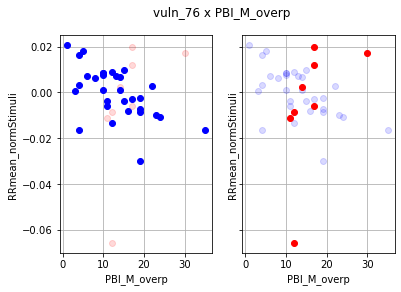

In [24]:
#%% Significant results>>>
label = 2
data_label = data.query('label == @label')

gene_col = 'vuln_76'
env_col = 'PBI_M_overp'

data_nonvuln = data_label.query(f'{gene_col} == 0 ')
data_vuln = data_label.query(f'{gene_col} == 1 ')

formula = f'{TARGET} ~ C({gene_col}) + {env_col} + C({gene_col})*{env_col}'
model = smf.ols(formula=formula, data=data_label).fit()
print('\n')
print(f'{gene_col} x {env_col}')
print(model.summary())

f, axes = plt.subplots(1,2, sharex=True, sharey=True)

f.suptitle(f'{gene_col} x {env_col}')

plt.sca(axes[0])
plt.plot(data_vuln[env_col], data_vuln[TARGET], 'or', alpha=0.15)
plt.plot(data_nonvuln[env_col], data_nonvuln[TARGET], 'ob')
plt.grid(True)
plt.xlabel(env_col)
plt.ylabel(TARGET)

plt.sca(axes[1])
plt.plot(data_nonvuln[env_col], data_nonvuln[TARGET], 'ob', alpha=0.15)
plt.plot(data_vuln[env_col], data_vuln[TARGET], 'or')
plt.grid(True)
plt.xlabel(env_col)
plt.ylabel(TARGET)